<a href="https://colab.research.google.com/github/preethi9999/info5731_spring2021/blob/main/somaraju_preethi_inclass10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of the exercise is to practice different machine learning algorithms for text clustering Please downlad the dataset by using the following link. https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones (You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, DBSCAN, Hierarchical clustering.

You can refer to of the codes from the follwing link below. https://www.kaggle.com/karthik3890/text-clustering

In [43]:
#loading the data and displaying the content

data=pd.read_csv("/content/sample_data/Amazon_Unlocked_Mobile.csv")
data = data.head(10000)

In [44]:
data_new = data.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


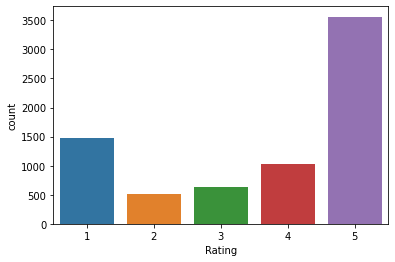

In [46]:
#understanding ratings distribution

import seaborn as sns
sns.countplot(data_new.Rating)       

In [47]:
#datacleaning
import seaborn as sns
data_new['Rating'].value_counts()

5    3563
1    1481
4    1031
3     639
2     512
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


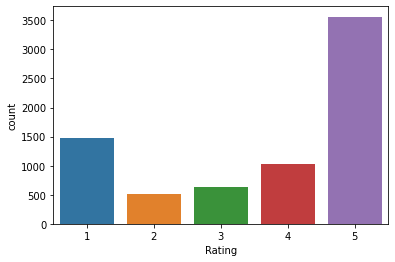

In [48]:
sns.countplot(data_new.Rating)

In [49]:
#finding sentence containing html tags

import re
i=0;
for sent in data_new['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [50]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [51]:
data_new['Cleaned Text'] = data_new['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_new['Cleaned Text'] = data_new['Cleaned Text'].apply(lambda x: cleanhtml(x))
data_new['Cleaned Text'] = data_new['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_new['Cleaned Text'] = data_new['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
#Kmeans method

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_new['Cleaned Text'].values)

In [54]:
# understand kind of words generated

terms = count_vect.get_feature_names()

In [55]:
# using all processes jobs=-1 and k means++ for starting initilization advantage

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [56]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[0.02807018, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02714932, 0.        , 0.        , ..., 0.00904977, 0.00452489,
        0.00452489],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01666667],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.15789474, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00231392, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
# which tells us that clusters are far away from each other 

from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.2080210321419799

In [63]:
# Giving Labels/assigning a cluster to each point/text 

df = data_new
df['Bow Clus Label'] = model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
#How many points belong to each cluster

df.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0     285
1     221
2      60
3       4
4       1
5     171
6    1276
7       3
8      19
9    5186
Name: Reviews, dtype: int64

In [66]:
#To find the top 10 features of cluster centriod

print("Top 10 terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top 10 terms per cluster:
Cluster 0: iphone
 phone
 new
 like
 apple
 buy
 used
 3gs
 one
 screen
Cluster 1: phone
 screen
 good
 great
 one
 camera
 battery
 like
 price
 speakers
Cluster 2: phone
 screen
 use
 like
 good
 really
 card
 sim
 great
 battery
Cluster 3: phone
 camera
 good
 like
 quality
 one
 price
 screen
 display
 app
Cluster 4: phone
 idol
 camera
 one
 like
 sound
 think
 device
 quality
 screen
Cluster 5: phone
 one
 good
 would
 great
 screen
 like
 use
 battery
 get
Cluster 6: phone
 new
 great
 good
 one
 would
 work
 screen
 use
 like
Cluster 7: like
 phone
 camera
 screen
 android
 keyboard
 also
 would
 google
 phones
Cluster 8: phone
 screen
 like
 one
 good
 use
 battery
 phones
 time
 would
Cluster 9: phone
 great
 good
 works
 new
 work
 like
 iphone
 product
 price


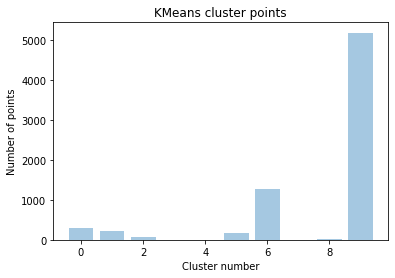

In [67]:
# visually how points or reviews are distributed across 10 clusters 

import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel('Cluster number')
plt.ylabel('Number of points')
plt.show()

In [71]:
sentences = []
for sentence in data_new['Cleaned Text'].values:
  sentences.append(sentence.split())

import gensim
w2v_model=gensim.models.Word2Vec(sentences,size=100, workers=4)

In [72]:
num_clust = [x for x in range(3,11)]
num_clust

[3, 4, 5, 6, 7, 8, 9, 10]

In [75]:
import numpy as np
sent_vectors = []
for sent in sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


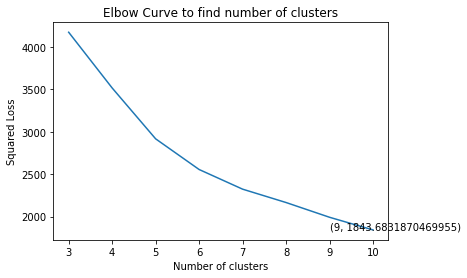

In [77]:
# elbow curve

squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Squared Loss")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [78]:
print ("The optimal number of clusters: ", optimal_clusters)
print ("The loss for optimal cluster: ", min(squared_errors))

The optimal number of clusters:  9
The loss for optimal cluster:  1843.6831870469955


In [79]:
# Training the best model
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
word_cluster_pred = model2.predict(sent_vectors)
word_cluster_pred_2 = model2.labels_
word_cluster_center = model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.37022237,  0.68430651,  0.34470582,  0.00181774,  0.0823254 ,
        -0.00459267,  0.68024127, -0.22281218,  0.31506633, -0.24506185,
         0.52766125, -0.01450369,  0.35711255, -0.26926696,  0.0888411 ,
         0.27099229, -0.21685332,  0.25055269, -0.17623791, -0.26552087,
         0.24818794,  0.05410311,  0.2836734 ,  0.0788842 , -0.40033956,
        -0.34303728,  0.18925958,  0.14282232,  0.53929428, -0.01008349,
         0.22257294, -0.50078622,  0.83819013,  0.1583123 ,  0.17221559,
        -0.13023604, -0.2713831 ,  0.1016697 , -0.44980562, -0.49299294,
         0.33925487,  0.57159668,  0.23193102,  0.16127873, -0.29589895,
         0.10935191,  0.19838754,  0.06133627,  0.20114448, -0.28324409,
         0.78677213,  0.4391173 , -0.09395155, -0.23440591, -0.14195041,
        -0.63729477, -0.11374705, -0.58054413, -0.19505185,  0.56880843,
        -0.03100386, -0.1248896 ,  0.19595515, -0.04121602, -0.22294103,
        -0.2054076 , -0.39959937,  0.68255632,  0.0

In [81]:
#DBSCAN clustering

from sklearn.cluster import DBSCAN

In [82]:
# Computing 200th Nearest neighbour distance

minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [83]:
#Computing the 200th nearest neighbour distance of some point the dataset

twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

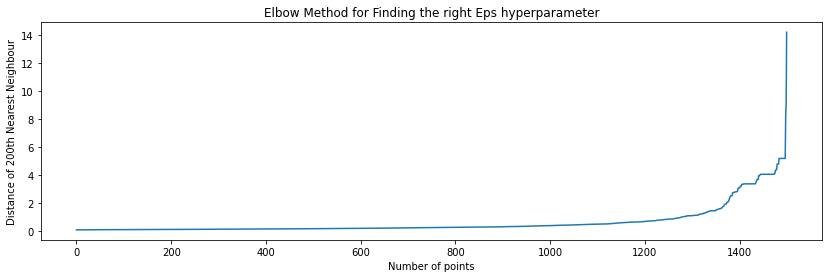

In [85]:
# Plotting for the Elbow Method

plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [86]:
# Training DBSCAN 

model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,7226,7226,7226


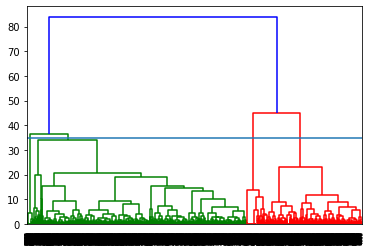

In [87]:
#Hierarchical Clustering

import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)

In [88]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Agg=cluster.fit_predict(sent_vectors)

In [91]:
#assigning cluster to each point

hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [92]:
# How many points belong to each cluster

hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    2031
1    4411
2     449
3     140
4     195
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
'''
In the above we have used elbow method to find the optimal number of clusters for k-means and for DBSCAN clustering we have found the optimal number of epsilons 
and used dendogram for Hierarchial clustering. These are the popular clustering algorithms. if we look at the above diagrams there is no clear distinction if clusters
in dendogram or DBSCAN clustering where as with Kmeans clusters are clearly defined and very far each other which means there is not intersection of words.
 so for my data set KNN clustering seems to be best bet. '''